# Lecture 3 Deviance Analysis + Lecture 5 Residual Analysis

## First Proper GLM Example with Analysis of Deviance

In [61]:
library(MASS)

In [45]:
city <- c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34)

no.tested <- c(4, 10, 5, 10, 2, 5, 8, 19, 6, 10, 24, 1, 30, 22, 1, 11, 1, 54, 9, 18, 12, 1, 11, 77, 51, 16, 82, 13, 43, 75, 13, 10, 6, 37)

no.pos <- c(2, 3, 1, 3, 2, 3, 2, 7, 3, 8, 7, 0, 15, 4, 0, 6, 0, 33, 4, 5, 2, 0, 8, 41, 24, 7, 46, 9, 23, 53, 8, 3, 1, 23)

rain <- c(1735, 1936, 2000, 1973, 1750, 1800, 1750, 2077, 1920, 1800, 2050, 1830, 1650, 2200, 2000, 1770, 1920, 1770, 2240, 1620, 1756, 1650, 2250, 1796, 1890, 1871, 2063, 2100, 1918, 1834, 1780, 1900, 1976, 2292)

## Testing people for *toxoplasmosis* in different cities.

* Have $n=34$ observations

* Interest in whether there's a relationship between **rainfall** and the **proportion testing positive** in each city

* When you hear this kind of setup: think **binomial**, **logistic regression**, and think **change the variables to include a proportion**

###  Parameters

* $y_{i}$ is the number that test positive in city $i$

* $n_{i}$ is the number of people in city $i$

* $p_{i}$ is the proportion that test positive in city $i$

* $\pi_{i}$ is the chance that a random person in city $i$ has the illness.

* **Clearly,** $p_{i} = \dfrac{y_{i}}{n_{i}}$

* $y_{i} \sim \text{Binomial}(n_{i}, \pi_{i})$.

### Exploratory Variables

* $x_{i}$ is the amount of rainfall in city $i$.

### Model

If using Binomial distribution, the canonical link function is the logit link function:

> $g(\mu_{i}) = g(\pi_{i}) = \eta_{i}$

> $\theta_{i} = \ln \left ( \dfrac{\pi_{i}}{1 - \pi_{i}} \right )$

Using the canonical link:

> $g(\pi_{i}) = \ln \left ( \dfrac{\pi_{i}}{1 - \pi_{i}} \right ) = \eta_{i}$

We have one explanatory variable, but we're going to correct  for the mean, and then add a few extra powers of that corrected $x$... Our linear predictor will be:

> $\eta_{i} = \beta_{0} + \beta_{1}(x_{i} - \bar{x}) + \beta_{2}(x_{i} - \bar{x})^{2} + ... + \beta_{p}(x_{i} - \bar{x})^{p}$,

for $i = 1,2,...,n$.

### Non-linear *link* between the dependant parameter mean and the linear predictor:

> $g(\pi_{i}) = \ln \left ( \dfrac{\pi_{i}}{1 - \pi_{i}} \right ) = \beta_{0} + \beta_{1}(x_{i} - \bar{x}) + \beta_{2}(x_{i} - \bar{x})^{2} + ... + \beta_{p}(x_{i} - \bar{x})^{p}$.

### We want to find the most appropriate p.

# Setting up the dataframe

In [46]:
# scaling the rain
rain.m <- rain / 1000

In [47]:
# getting the mean corrected rain
rain.cor <- rain.m - mean(rain.m)

In [48]:
# transforming our random variable from y_i -> p_i
prop <- no.pos / no.tested

In [49]:
tox <- data.frame(city, prop, no.tested, rain.cor)

In [50]:
rm(city, no.tested, no.pos, rain, rain.m, rain.cor, prop)
attach(tox)

The following objects are masked from tox (pos = 3):

    city, no.tested, prop, rain.cor



# Fitting the GLM

In [51]:
tox.glm <- glm(prop ~ rain.cor + I(rain.cor^2) + I(rain.cor^3) + I(rain.cor^4) + I(rain.cor^5), family = binomial(link='logit'), weights = no.tested)

In [52]:
summary(tox.glm)


Call:
glm(formula = prop ~ rain.cor + I(rain.cor^2) + I(rain.cor^3) + 
    I(rain.cor^4) + I(rain.cor^5), family = binomial(link = "logit"), 
    weights = no.tested)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9829  -1.2096  -0.4572   0.4159   2.8846  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)
(Intercept)      0.00797    0.14373   0.055    0.956
rain.cor        -1.83177    1.38143  -1.326    0.185
I(rain.cor^2)    6.34843   11.73816   0.541    0.589
I(rain.cor^3)  -11.34461   54.33894  -0.209    0.835
I(rain.cor^4) -164.88357  142.70037  -1.155    0.248
I(rain.cor^5)  539.13267  483.51560   1.115    0.265

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 74.212  on 33  degrees of freedom
Residual deviance: 61.196  on 28  degrees of freedom
AIC: 163.89

Number of Fisher Scoring iterations: 3


## Let's go through the overall summary

* Min / Max stuff is useless

* Null deviance is has $n-1$ degrees of freedom, so we know we have $n=34$ just by looking at the Null deviance (this is the worst possible model)

* Overall deviance = $61.196$, which has $n - p$ degrees of freedom, therefore we know we have $p=6$, which is the intercept parameter, plus the five parameters associated with our five rain measures.

* We know that $\phi = 1$ because this is a single parameter distribution

* So $S = D \sim \chi^{2}_{n-p}$

### Hypothesis test

> $H_{0}: \beta_{p+1} = \beta_{p+2} = ... = \beta_{n} = 0$

**Reject $H_{0}$ at the $100\alpha$% level  of significance if $S = D > \chi^{2}_{n-p}(\alpha)$**

In [53]:
pchisq(61.196,28,lower.tail = F)

[1] 0.0002858566

**We can therefore reject the null hypothesis (that we do not need to add any more parameters to the model) at the 0.1% level of significance, and therefore accept the alternative hypothesis, that at least one of the additional parameters that's in the saturated model, but not in the current model, is significantly non-zero**

I.e. we're missing parameters.

In [54]:
anova(tox.glm)

,Df,Deviance,Resid. Df,Resid. Dev
NULL,NA,NA,33,74.21188
rain.cor,1,1.243923e-01,32,74.08749
I(rain.cor^2),1,1.460491e-05,31,74.08747
I(rain.cor^3),1,1.145287e+01,30,62.63460
I(rain.cor^4),1,1.881927e-01,29,62.44641
I(rain.cor^5),1,1.250249e+00,28,61.19616


## Inspection of the ANOVA table (the analysis of deviance table)

See a significant drop in the residual deviance (**THINK RESIDUAL SUM OF SQUARES... AND YOU WANT THIS TO BE LOW!**) after adding the cubic term.

You can check the scaled deviance difference statistic, $W$,

> $W = S_{r} - S_{f} \sim \chi^{2}_{q-p}$

(Where $S_{r}$ is the reduced model ($p$ parameters) scaled deviance, and $S_{f}$ is the full model ($q$ parameters) scaled deviance)

> $W = \dfrac{D_{r} = D{f}}{\phi} = D_{r} = D{f}$

(since $\phi$ = 1)

Therefore, you can test the hypothesis between models:

> $H_{0}: \beta_{0} = \beta_{1} = \beta_{2} = 0$

via:

> $W = 74.21188 - 62.63460 \sim \chi^{2}_{q-p}$

where $q = 4$ and $p = 1$

In [55]:
pchisq(74.21188-62.63460,3,lower.tail=F)

[1] 0.008980838

So we can reject this hypothesis at the 1% level of significance which means the null model is missing parameters... But this is pretty obvious, and we've already rejected the hypothesis that the  full five variable model has a sufficient number of parameters.

# Refitting GLM just upto the third order term

In [56]:
tox.glm <- glm(prop ~ rain.cor + I(rain.cor^2) + I(rain.cor^3), family = binomial(link='logit'), weights = no.tested)

In [57]:
summary(tox.glm)


Call:
glm(formula = prop ~ rain.cor + I(rain.cor^2) + I(rain.cor^3), 
    family = binomial(link = "logit"), weights = no.tested)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7620  -1.2166  -0.5079   0.3538   2.6204  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    0.09939    0.10197   0.975 0.329678    
rain.cor      -2.55187    0.88276  -2.891 0.003843 ** 
I(rain.cor^2) -6.06369    2.96348  -2.046 0.040743 *  
I(rain.cor^3) 39.32248   11.73606   3.351 0.000806 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 74.212  on 33  degrees of freedom
Residual deviance: 62.635  on 30  degrees of freedom
AIC: 161.33

Number of Fisher Scoring iterations: 3


In [58]:
pchisq(62.635,30,lower.tail = F)

[1] 0.0004365815

Again, we can reject the null hypothesis that the model has sufficient parameters, and accept the alternative that we're missing parameters present in the saturated model that aren't in the current model.

## Plotting the data

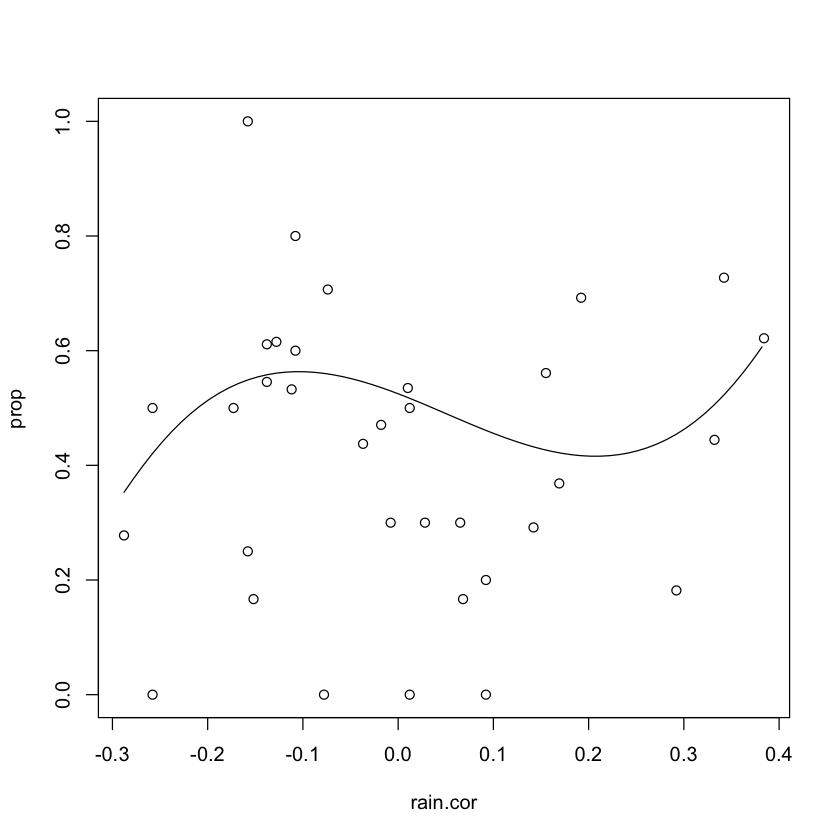

In [59]:
x <- seq(min(rain.cor),max(rain.cor),0.01)
pred <- predict(tox.glm, data.frame(rain.cor=x),type='response')

plot(rain.cor,prop)
lines(x,pred)

# Lecture 5: Looking at residuals

In [78]:
# interesting, looks like you get deviance residuals out of the box as standard
tox['stdres'] <- stdres(tox.glm)
tox['pearson'] <- resid(tox.glm, type='pearson')
tox['response'] <- resid(tox.glm, type='response')
tox['deviance'] <- resid(tox.glm, type='deviance')
tox['residuals'] <- residuals(tox.glm)

tox['fitted'] <- fitted(tox.glm)

tox[1:5,]

city,prop,no.tested,rain.cor,stdres,pearson,response,deviance,residuals,fitted
1,0.5,4,-0.17285294,-0.1131643,-0.1563972,-0.0389803,-0.1561589,-0.1561589,0.5389803
2,0.3,10,0.02814706,-0.9480863,-1.3023758,-0.2059093,-1.3196999,-1.3196999,0.5059093
3,0.2,5,0.09214706,-0.8484693,-1.1706265,-0.2609610,-1.2200810,-1.2200810,0.4609610
4,0.3,10,0.06514706,-0.8296327,-1.1367258,-0.1795822,-1.1556299,-1.1556299,0.4795822
5,1.0,2,-0.15785294,0.9234798,1.2819041,0.4510438,1.5488534,1.5488534,0.5489562


## Note, if you sum up the square of the deviance residuals..., you get the residual deviance!

In [81]:
sum(tox$deviance**2)

[1] 62.6346

## Plotting the residuals against the index of the data is a way  of checking for independence

> Not what the lecturer has said to do...

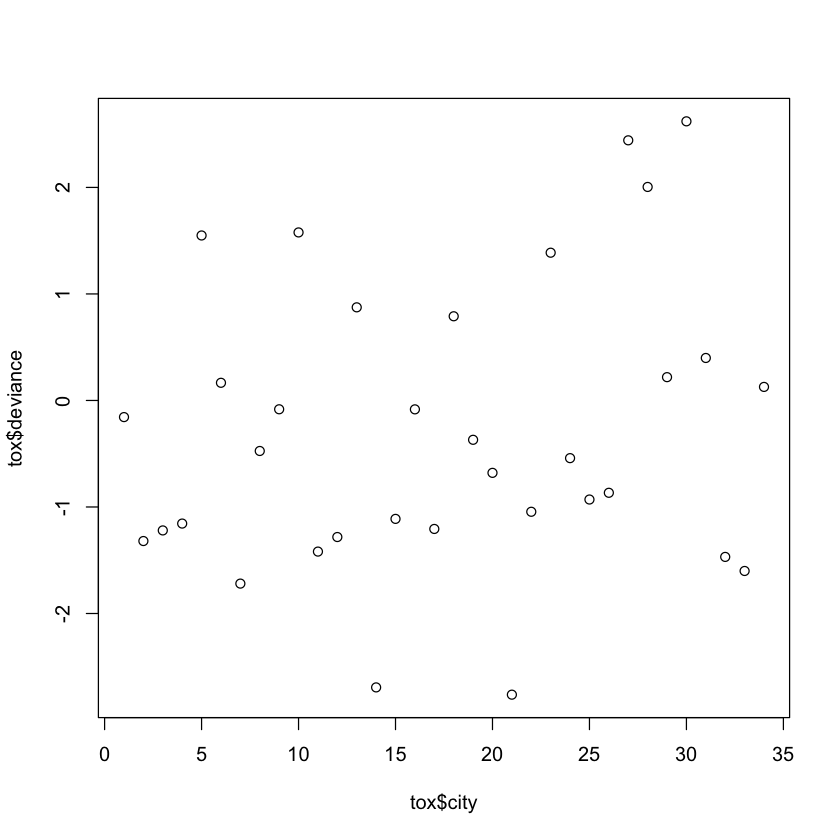

In [82]:
plot(tox$city, tox$deviance)

## The point the notes try to make is to look for some dodgy looking data points, take them out by setting their weights to 0 in the logistic regression weights, and then  re-analyse the deviance... But this seems pretty dodgy practice.